#Aula 01

Repositório com informações sobre o dataset:

https://github.com/zalandoresearch/fashion-mnist

In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist

In [2]:
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

In [3]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
len(imagens_treino)
imagens_treino.shape

(60000, 28, 28)

In [5]:
identificacoes_teste.shape

(10000,)

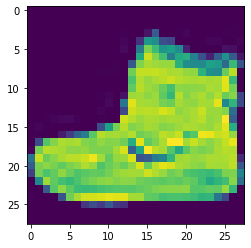

In [6]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])

#Aula 02

Text(0.5, 1.0, '9')

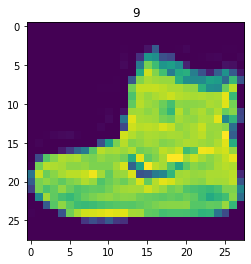

In [7]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [8]:
print("O menor argumento é %.d e o maior é %.d" % (identificacoes_treino.min(),identificacoes_treino.max()))

O menor argumento é 0 e o maior é 9


In [9]:
total_de_classificacoes = identificacoes_treino.max()-identificacoes_treino.min()+1

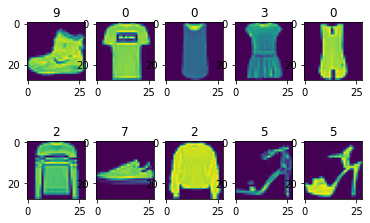

In [10]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])
  

In [11]:
nomes_de_classificacoes = ['Camiseta','Calca','Pullover',
                           'Vestido','Casaco','Sandália',
                           'Camisa','Tenis','Bolsa','Bota']

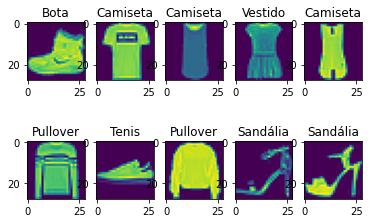

In [12]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
  

## Criando um modelo

In [13]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28))     
     #processamento
     #saida 
     ])

Uma biblioteca para pré-processamento da imagem é a ndimage.

`from scipy import ndimage`

#Aula 03

In [14]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])

#modelo.fit(imagens_treino,identificacoes_treino)

Treinar este modelo não é possível sem antes compilar. Seguimos para a próxima aula.

#Aula 04

In [15]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 12.0310


Verificando se há cor na imagem

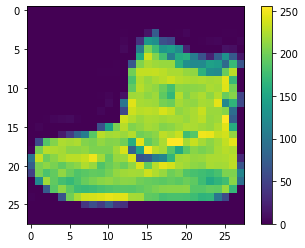

In [16]:
plt.imshow(imagens_treino[0])
plt.colorbar()  

Vamos tratar a imagem pois há muita informação de cor

In [17]:
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6130


Houve uma perda bem menor do que o exemplo anterior. Isto se deve ao fato de que as imagens de treino estão normalizados.

Vamos testar uma nova camada

In [18]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(128,activation=tensorflow.nn.relu),
     keras.layers.Dense(64,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6289


Incrementar as camadas gerou uma perda maior. Deve-se continuar apenas com 1 camada oculta.

In [19]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6149


#Aula 05

In [20]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(imagens_treino,identificacoes_treino,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6037 - accuracy: 0.7905
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3682 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3203 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3030 - accuracy: 0.8885
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2860 - accuracy: 0.8952


Utilizando o modelo para testar

In [21]:
import numpy as np

testes = modelo.predict(imagens_teste/float(255))

print('Resultado do teste:',np.argmax(testes[0]))
print('Número da Imagem de Teste:',identificacoes_teste[0])

Resultado do teste: 9
Número da Imagem de Teste: 9


In [22]:
print('Resultado do teste:',np.argmax(testes[1]))
print('Número da Imagem de Teste:',identificacoes_teste[1])

Resultado do teste: 2
Número da Imagem de Teste: 2


In [23]:
imagens_teste = imagens_teste/float(255)

In [24]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)
print('Perda do teste:',perda_teste)
print('Acurácia do teste:',acuracia_teste)

313/313 [==============================] - 1s 1ms/step - loss: 0.3464 - accuracy: 0.8733
Perda do teste: 0.3464018702507019
Acurácia do teste: 0.8733000159263611


In [25]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6367 - accuracy: 0.7770 - val_loss: 0.3903 - val_accuracy: 0.8621
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3813 - accuracy: 0.8612 - val_loss: 0.4164 - val_accuracy: 0.8475
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3427 - accuracy: 0.8717 - val_loss: 0.3466 - val_accuracy: 0.8767
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3115 - accuracy: 0.8855 - val_loss: 0.3641 - val_accuracy: 0.8748
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.8933 - val_loss: 0.3203 - val_accuracy: 0.8853


#Aula 06

In [26]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6318 - accuracy: 0.7782 - val_loss: 0.4233 - val_accuracy: 0.8508
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3841 - accuracy: 0.8589 - val_loss: 0.3924 - val_accuracy: 0.8508
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3340 - accuracy: 0.8784 - val_loss: 0.3430 - val_accuracy: 0.8788
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8827 - val_loss: 0.3548 - val_accuracy: 0.8744
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.8911 - val_loss: 0.3392 - val_accuracy: 0.8778


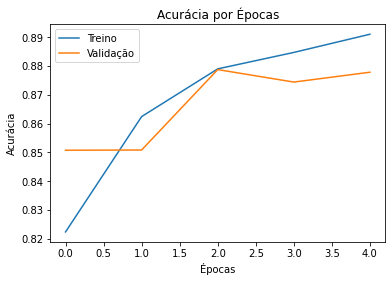

In [27]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

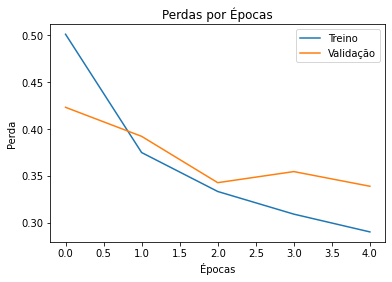

In [28]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perdas por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [29]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6256 - accuracy: 0.7833 - val_loss: 0.4080 - val_accuracy: 0.8552
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3872 - accuracy: 0.8607 - val_loss: 0.3566 - val_accuracy: 0.8698
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3360 - accuracy: 0.8758 - val_loss: 0.3416 - val_accuracy: 0.8769
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3123 - accuracy: 0.8844 - val_loss: 0.3310 - val_accuracy: 0.8822
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2924 - accuracy: 0.8893 - val_loss: 0.3371 - val_accuracy: 0.8827
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2745 - accuracy: 0.8988 - val_loss: 0.3383 - val_accuracy: 0.8810
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2620 - accuracy: 0.9033 - val_loss: 0.3253 - val_accuracy:

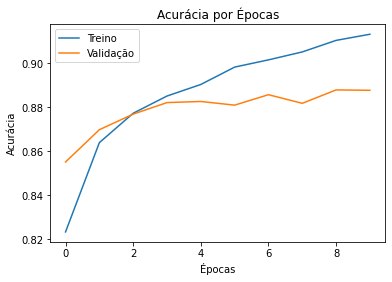

In [30]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

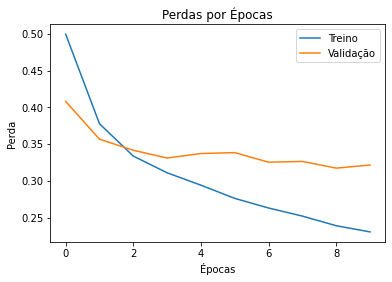

In [31]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perdas por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

Se o gráfico da validação vem caindo e o teste subindo, estamos tendo uma situação de **overfitting**. Caso o contrário, estamos com uma situação de **underfitting**.

"Adormecendo" camadas

In [32]:
modelo = keras.Sequential([                    
     keras.layers.Flatten(input_shape=(28,28)), 
     keras.layers.Dense(256,activation=tensorflow.nn.relu),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(10,activation=tensorflow.nn.softmax)
])


modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6640 - accuracy: 0.7648 - val_loss: 0.4176 - val_accuracy: 0.8471
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4052 - accuracy: 0.8522 - val_loss: 0.3679 - val_accuracy: 0.8680
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3681 - accuracy: 0.8653 - val_loss: 0.3538 - val_accuracy: 0.8757
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3407 - accuracy: 0.8735 - val_loss: 0.3611 - val_accuracy: 0.8662
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3251 - accuracy: 0.8802 - val_loss: 0.3328 - val_accuracy: 0.8826


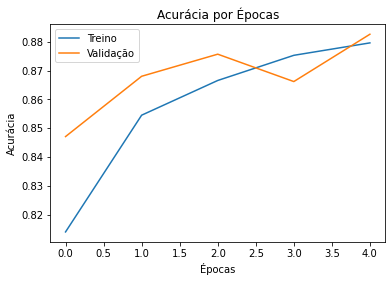

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

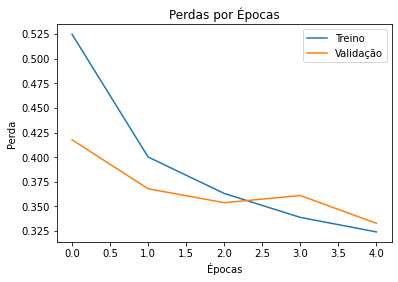

In [34]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perdas por Épocas")
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [35]:
modelo.save('modelo_fashion_mnist.h5')

In [36]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('/content/modelo_fashion_mnist.h5')

In [37]:
testes_modelos_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do Teste:',np.argmax(testes[1]))
print('Resultado do Modelo Salvo:',np.argmax(testes_modelos_salvo[1]))
print('Número da Imagem de Teste:',identificacoes_teste[1])

Resultado do Teste: 2
Resultado do Modelo Salvo: 2
Número da Imagem de Teste: 2


Validado que tem como importar o modelo gerado para os próximos códigos.